<a href="https://colab.research.google.com/github/fboldt/aulas-am-bsi/blob/main/aula14a_non_supervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np

blob_centers = np.array([[0.2, 2.3], [-1.5, 2.3], [-2.8, 1.8],
                         [-2.8, 2.8], [-2.8, 1.3]])

blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

k = 5
kmeans = KMeans(n_clusters=k, init="random", n_init="auto", random_state=42)
y_pred = kmeans.fit_predict(X)


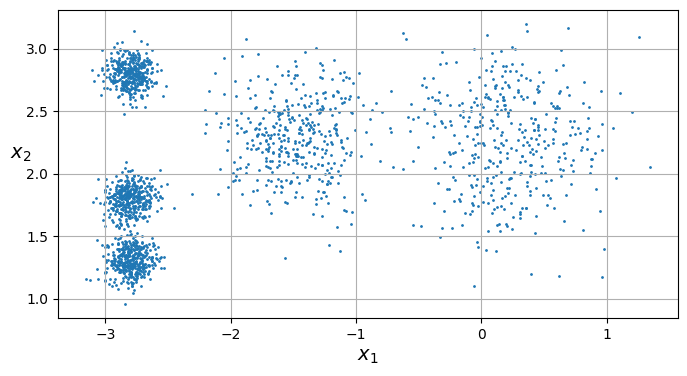

In [3]:
import matplotlib.pyplot as plt

def plot_custer(X, y=None):
  plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
  plt.xlabel("$x_1$", fontsize=14)
  plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.figure(figsize=(8, 4))
plot_custer(X)
plt.grid()
plt.show()

In [4]:
y_pred

array([2, 1, 0, ..., 4, 0, 1], dtype=int32)

In [5]:
y_pred is kmeans.labels_

True

In [6]:
kmeans.cluster_centers_

array([[ 0.20876306,  2.25551336],
       [-2.80389616,  1.80117999],
       [-2.80037642,  1.30082566],
       [-1.46679593,  2.28585348],
       [-2.79290307,  2.79641063]])

In [7]:
blob_centers

array([[ 0.2,  2.3],
       [-1.5,  2.3],
       [-2.8,  1.8],
       [-2.8,  2.8],
       [-2.8,  1.3]])

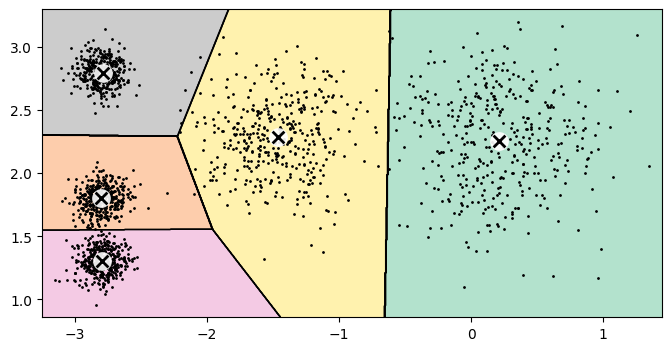

In [12]:
def plot_data(X):
  plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
  if weights is not None:
    centroids = centroids[weights > weights.max() / 10]
  plt.scatter(centroids[:, 0], centroids[:, 1],
              marker='o', s=30, linewidths=8,
              color=circle_color, zorder=10, alpha=0.9)
  plt.scatter(centroids[:, 0], centroids[:, 1],
              marker='x', s=2, linewidths=12,
              color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True):
  mins = X.min(axis=0) - 0.1
  maxs = X.max(axis=0) + 0.1
  xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                       np.linspace(mins[1], maxs[1], resolution))
  Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
               cmap="Pastel2")
  plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
              linewidths=1, colors='k')
  plot_data(X)
  if show_centroids:
    plot_centroids(clusterer.cluster_centers_)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

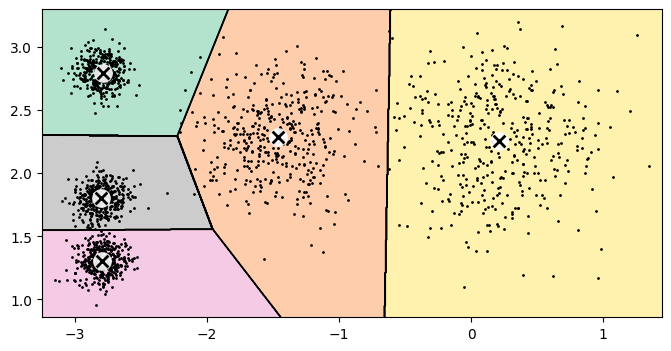

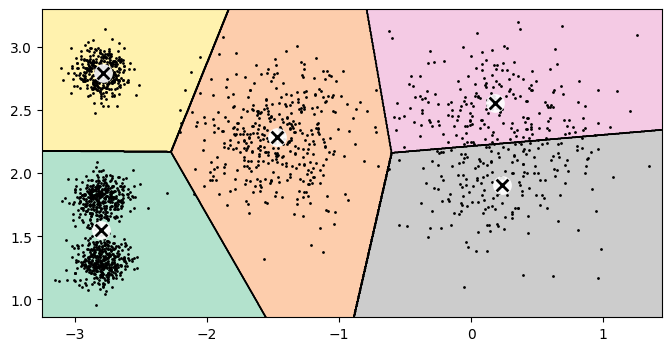

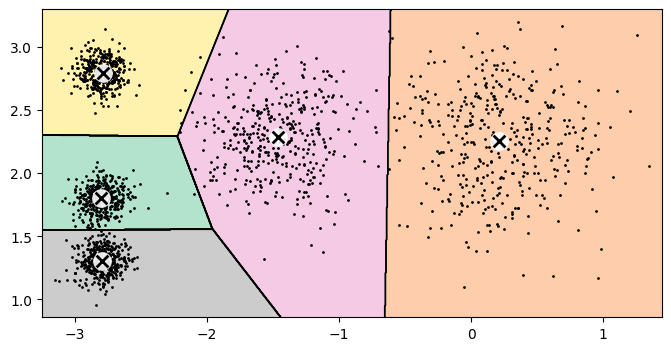

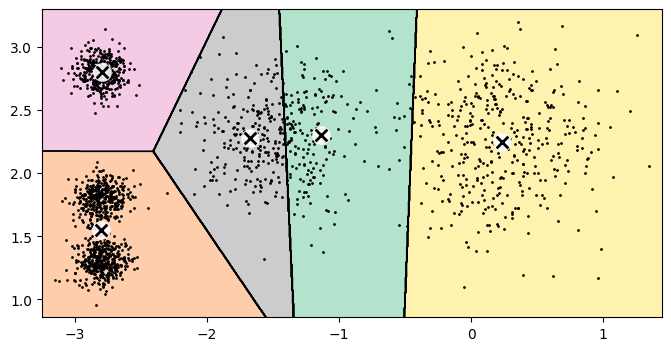

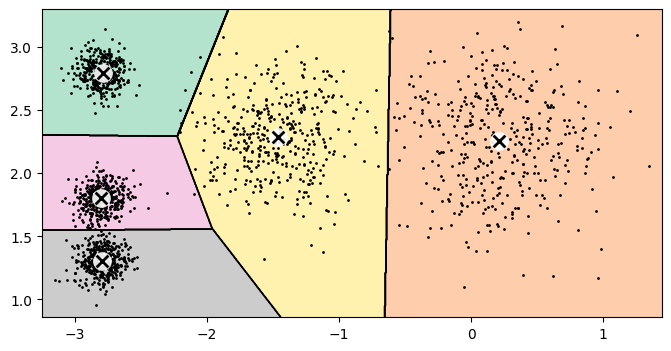

In [13]:
for _ in range(5):
  plt.figure(figsize=(8, 4))
  plot_decision_boundaries(KMeans(n_clusters=k,
                                  init="k-means++",
                                  n_init="auto").fit(X),
                           X)
  plt.show()

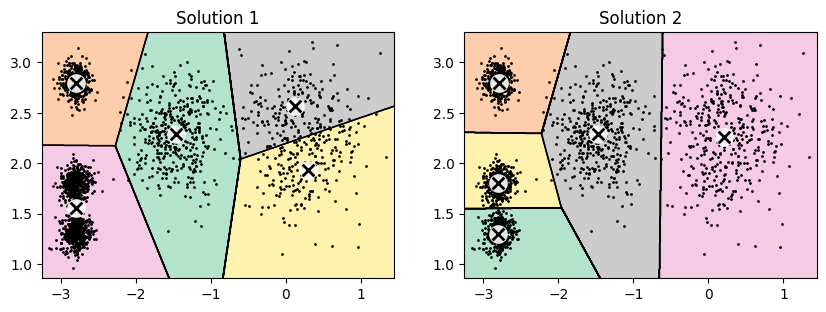

In [14]:
def plot_cluster_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
      plt.title(title1)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X)
    if title2:
      plt.title(title2)

kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1, random_state=2)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1, random_state=9)

plot_cluster_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                        "Solution 1", "Solution 2")
plt.show()

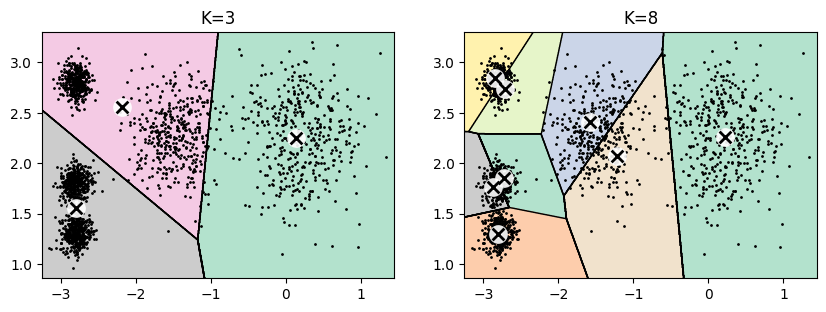

In [15]:
kmeans_k3 = KMeans(n_clusters=3, init="random", n_init=1, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, init="random", n_init=1, random_state=42)

plot_cluster_comparison(kmeans_k3, kmeans_k8, X,
                        "K=3", "K=8")
plt.show()

In [16]:
kmeans_k3.inertia_

653.2167190021554

In [17]:
kmeans_k8.inertia_

184.1645290381101

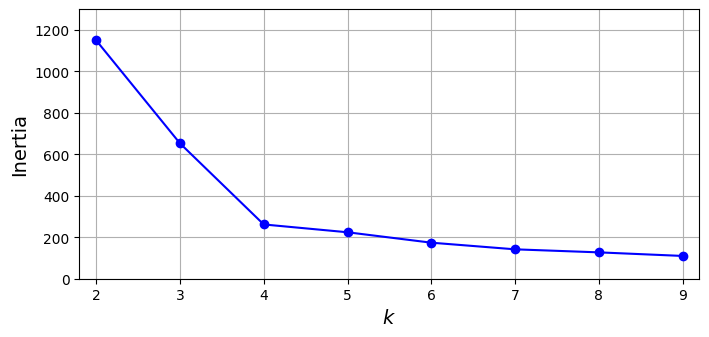

In [20]:
kmeans_per_k = [KMeans(n_clusters=k, n_init="auto", random_state=42).fit(X)
                for k in range(2, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]
plt.figure(figsize=(8, 3.5))
plt.plot(range(2, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.axis([1.8, 9.2, 0, 1300])
plt.grid()
plt.show()

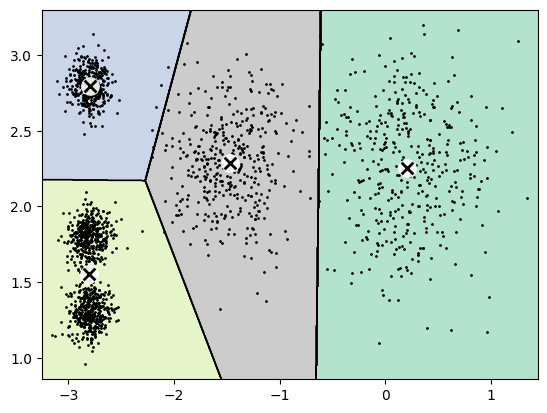

In [21]:
plot_decision_boundaries(kmeans_per_k[4-2], X)
plt.show()